**CS7357 – Neural Networks and Deep Learning**  
**Assignment 1:** Regression Analysis using Linear Regression  
**Name:** Sukumar Muthusamy  
**Section:** W01  
**Term:** Fall 2025  
**Submission Date:** 09/14/2025

## Task 1: Load Dataset and Create a DataFrame
In this step, the SalaryData.csv file is uploaded and loaded into a pandas DataFrame. To verify that the dataset is loaded correctly, I display the first few rows, print the dataset shape and data types, and also generate summary statistics to understand the structure of the dataset.

In [1]:
import pandas as pd
from google.colab import files

# To upload the CSV file from local
uploaded_file = files.upload()

# To read into a dataframe
salary_ds = pd.read_csv("Assignment1_SalaryData.csv")

# To display the first 5 rows
print("\nFirst 5 rows of the dataset:")
display(salary_ds.head())

# Dataset shape and column info
print("\nDataset shape:", salary_ds.shape)
print("\nData types:")
print(salary_ds.dtypes)

# Summary statistics
print("\n" + "="*45)
print("Summary statistics:")
print("="*45)
display(salary_ds.describe())

Saving Assignment1_SalaryData.csv to Assignment1_SalaryData.csv

First 5 rows of the dataset:


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0



Dataset shape: (30, 2)

Data types:
YearsExperience    float64
Salary             float64
dtype: object

Summary statistics:


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Task 2: Manual Calculation of Coefficient and Intercept without using libraries

We model Salary (y) as a linear function of YearsExperience (x) --> y = m x + b.

Let x̄ be the mean of x and ȳ be the mean of y.  
The **slope** m and **intercept** b for simple linear regression are computed as:

m = Σ (xᵢ − x̄)(yᵢ − ȳ)  /  Σ (xᵢ − x̄)²  
b = ȳ − m x̄

Below, I implemented these formulas step by step in plain Python (no scikit-learn), printed the resulting slope and intercept, and kept the steps readable to show the math clearly.

In [3]:
# To extract columns as plain Python lists
x_list = salary_ds["YearsExperience"].tolist()
y_list = salary_ds["Salary"].tolist()

# 1) Means of x and y
x_mean = sum(x_list) / len(x_list)
y_mean = sum(y_list) / len(y_list)

# 2) Numerator and denominator for slope m
num = 0.0  # Σ (x - x̄)(y - ȳ)
den = 0.0  # Σ (x - x̄)^2
for x, y in zip(x_list, y_list):
    dx = x - x_mean
    dy = y - y_mean
    num += dx * dy
    den += dx * dx

m_manual = num / den
b_manual = y_mean - m_manual * x_mean

print("="*45)
print("Manual Calculation Results")
print("="*45)
print(f"Mean of X (YearsExperience): {x_mean:.6f}")
print(f"Mean of Y (Salary):          {y_mean:.6f}")
print(f"Slope (m):                   {m_manual:.6f}")
print(f"Intercept (b):               {b_manual:.6f}")

Manual Calculation Results
Mean of X (YearsExperience): 5.313333
Mean of Y (Salary):          76003.000000
Slope (m):                   9449.962321
Intercept (b):               25792.200199


## Task 3: Linear Regression Model using scikit-learn

After manually calculating the slope and intercept, the next step is to use the
LinearRegression class from scikit-learn to fit a model on the same dataset.
Here, I treated "YearsExperience" as the independent variable (X) and "Salary" as the dependent variable (y).

The model is trained on the full dataset, and then I extracted the coefficient
(slope) and intercept directly from the trained model. I also generated predictions for the dataset to confirm that the regression line matches the observed salary values.

In [4]:
from sklearn.linear_model import LinearRegression

# To prepare features (X) and target (y)
X = salary_ds[["YearsExperience"]]
y = salary_ds["Salary"]

# To fit the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# To extract parameters and to make predictions
slope_sklearn = lin_reg.coef_[0]
intercept_sklearn = lin_reg.intercept_
y_pred = lin_reg.predict(X)

# To display the results
print("="*45)
print("scikit-learn Linear Regression Results")
print("="*45)
print(f"Slope (Coefficient): {slope_sklearn:.6f}")
print(f"Intercept:           {intercept_sklearn:.6f}")
print("\nFirst 5 Predictions:")
for i, pred in enumerate(y_pred[:5], start=1):
    print(f"Prediction {i}: {pred:.6f}")


scikit-learn Linear Regression Results
Slope (Coefficient): 9449.962321
Intercept:           25792.200199

First 5 Predictions:
Prediction 1: 36187.158752
Prediction 2: 38077.151217
Prediction 3: 39967.143681
Prediction 4: 44692.124842
Prediction 5: 46582.117306


## Task 4: Analyze the Model using Metrics (MAE, MSE, R²)

After fitting the linear regression model, I now evaluated its performance
using common regression metrics. These include:

- **Mean Absolute Error (MAE):** the average of the absolute differences
  between predicted and actual salary values. A smaller MAE means the
  predictions are closer to the true values.
- **Mean Squared Error (MSE):** the average of the squared differences
  between predicted and actual values. This penalizes larger errors more
  heavily than MAE.
- **R² Score:** a measure of how well the regression line explains the
  variability in the data. An R² value closer to 1 means the model fits the
  data well.

By calculating these metrics, I can understand both the accuracy and
the explanatory power of the regression model.


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To calculate the metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# To display the results
print("="*45)
print("Model Evaluation Metrics")
print("="*45)
print(f"1. Mean Absolute Error (MAE): {mae:.6f}")
print(f"2. Mean Squared Error (MSE):  {mse:.6f}")
print(f"3. R² Score:                  {r2:.6f}")


Model Evaluation Metrics
1. Mean Absolute Error (MAE): 4644.201289
2. Mean Squared Error (MSE):  31270951.722281
3. R² Score:                  0.956957


## Task 5: Visualization of Regression Line and Data Points

In this step, I created a scatter plot of the dataset with "YearsExperience"
on the x-axis and "Salary" on the y-axis. This shows the actual distribution
of the data points.

On top of the scatter plot, I plot the regression line generated from the
predicted values of the model. The regression line helps to visualize how
well the model fits the data, and makes it easier to see the overall
relationship between years of experience and salary.


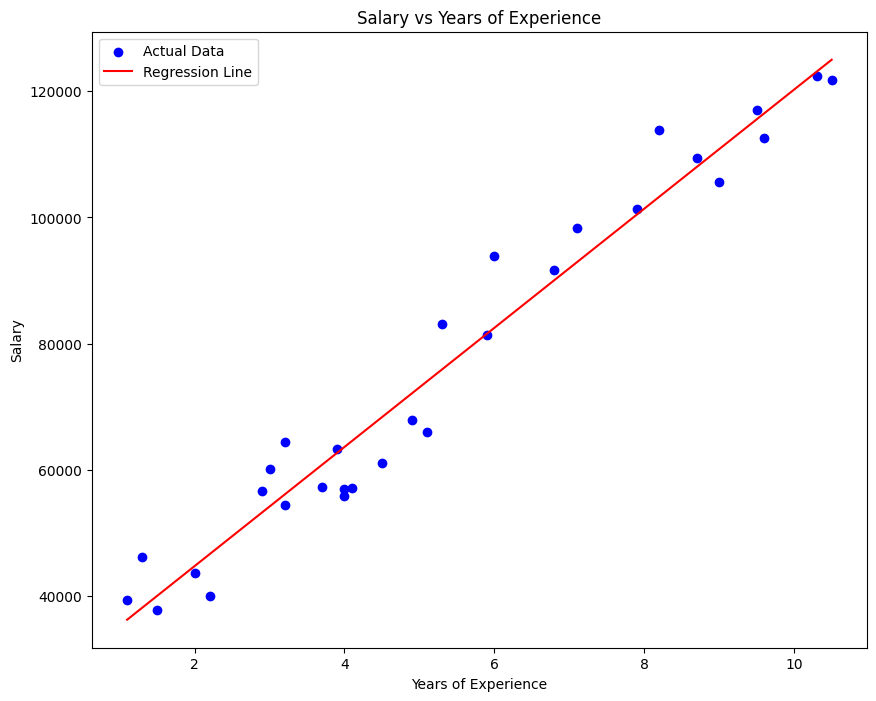

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label="Actual Data")

# Regression line
plt.plot(X, y_pred, color='red', linewidth=1.5, label="Regression Line")

# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()

# To display the plot
plt.show()
